# Project 2 Answers
#### Madeleine Bernstein
###### 04/01/2018

### Step 1: Load the python libraries you will need for this project

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set (admissions data)

In [3]:
admit_raw = pd.read_csv("../assets/admissions.csv")
print(admit_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions

**Question 1: How many observations are in this dataset?**

In [4]:
admit_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

**Answer:** 400 observations in the dataset

**Question 2: Create a Summary Table**

In [5]:
admit_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


**Question 3: Why would GRE have a larger STD than GPA?**

Standard deviation is the spread of the data from the mean.  Because the range of GPA (which can only be values between 0-4) is so much smaller than that of the GRE (which ranges from 0-800), the spread of the GRE data is going to be much larger.  Therefore, the GRE's standard deviation is going to be greater than that of the GPA data.

**Question 4: Drop data points with missing data**

In [6]:
admit = admit_raw.dropna()

**Question 5: Confirm that you dropped the right data; how can you tell?**

In [7]:
admit.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

Because now the count is down to the same number for all variables and is less than what any of them were before, 
we know that we dropped the correct rows so that all of our data is complete.  We could also find the index where admit.isnull() is True and if there aren't any, we know that we removed all the null values.

**Question 6: Create box plots for the GRE and GPA data**

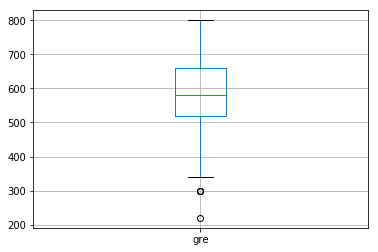

In [8]:
admit.boxplot(column = "gre", return_type = 'axes')

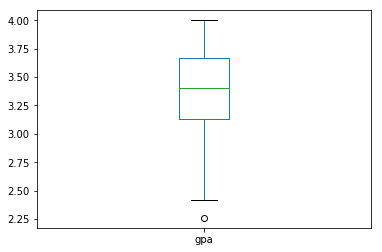

In [9]:
admit["gpa"].plot(kind = "box")

**Question 7: What do these plots show?**

These plots show the medians (marked as the green lines) and the first and third quartiles, which are the edges of the box.  The "whiskers" of the plot show the inner and outer fences of the data, which help us determine outliers.  The circles outside of the plot are what Python has deemed potential outliers.

These boxplots can help us visualize the data and help us to understand why the standard deviation for GRE is so much bigger than that of the GPA. Even though the GRE box may look smaller than the GPA one, the y axis indicates how much larger it actually is. 

**Question 8: Describe each distribution**

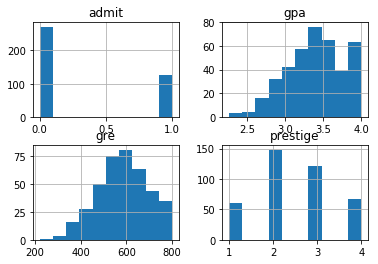

In [12]:
admit.hist()
pl.show()

**Question 9: If your model had an assumption of a normal distribution, would we meet that requirement?**

Yes we would meet the normal requirement.  Even though the data is skewed, the shape of GPA and GRE data are generally within our boundaries of normality.

**Question 10: Does this distribution need correction? If so, why? How?**

Because we are accepting that the GRE and GPA data are normal enough, there is no need to do any correction on this data.

**Question 11: Which of our variables are potentially collinear?**

In [14]:
admit.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


**Question 12: What did you find?**

Given the above correlation matrix, none of our variables are significantly collinear.

**Question 13: Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools**

Our plan is to come up with coefficients such that we can best predict: admit = m*prestige + intercept


In order to achieve this, we can use the smf.ols function to come up with an association between the two to give us the coefficients to fill the slope and the intercept.  We can also use the .summary() method to print out how strong the correlation is and give us some statistical analysis.  We can also use the linearregression module to come up with our predictions and plot these in comparison to our actual data to see how the model works.  We are also going to want to make the GPA and GRE data controls so that it doesn't interfere with just determining how prestige affects admittance rate.

**Question 14: What is your hypothesis?**

I think that prestige of undergraduate school is going to play quite a large part in determining if a student gets admitted into grad school. I think there will be strong linear relationship between the two.